In [62]:
import numpy as np
#from scipy.special import softmax

import matplotlib.pyplot as plt
import matplotlib

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable


import torchvision
import torchvision.transforms as transforms

In [44]:
matplotlib.rcParams['figure.figsize'] = (12,7) # Til rapport
#matplotlib.rcParams['figure.figsize'] = (20,10) # Til undervejs

In [21]:
def sig(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

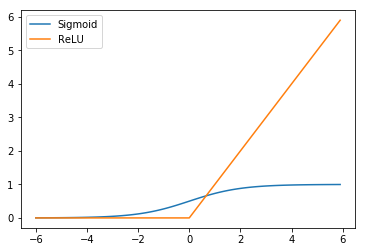

In [26]:
xs = np.arange(-6,6,0.1)
sigs = sig(xs)
relus = relu(xs)

plt.plot(xs, sigs, label='Sigmoid')
plt.plot(xs, relus, label='ReLU')
plt.legend()

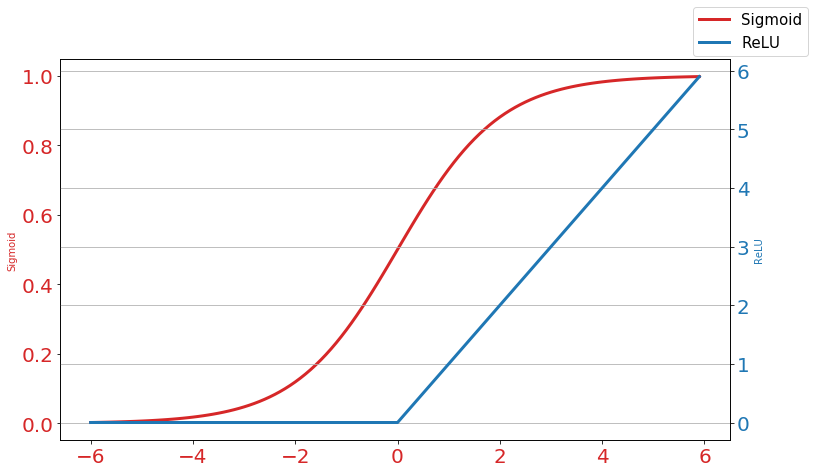

In [56]:
fig, ax1 = plt.subplots()

labelsize = 20
lw = 3
color = 'tab:red'
#ax1.set_xlabel('Steps (s)')
ax1.set_ylabel('Sigmoid', color=color)
ax1.plot(xs, sigs, color=color, label='Sigmoid', lw=lw)
ax1.tick_params(axis='both', labelcolor=color, labelsize=labelsize)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('ReLU', color=color)  # we already handled the x-label with ax1
ax2.plot(xs, relus, color=color, label='ReLU', lw=lw)
ax2.tick_params(axis='y', labelcolor=color, labelsize=labelsize)
plt.tick_params(axis='x', labelsize=labelsize)
plt.grid(True, axis='both')
fig.legend(prop={'size': 15})
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('../graphs/activation.png')

[-4.467733  -2.467733  -5.467733  -3.467733  -0.4677329 -1.4677329
 -4.467733 ]


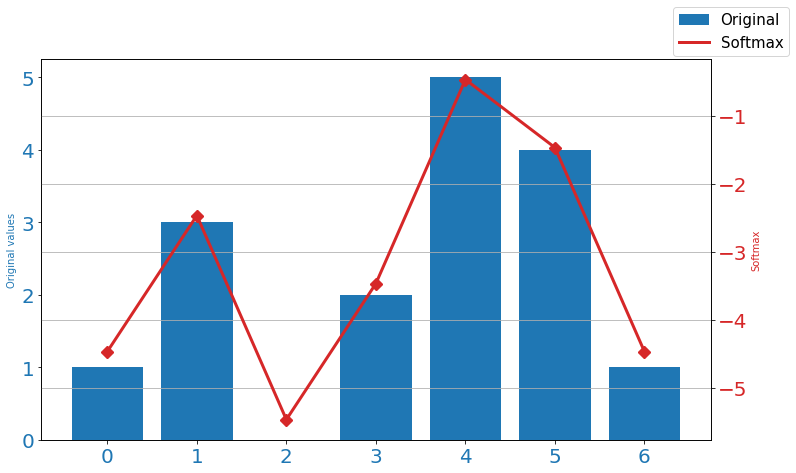

In [92]:
vals  = np.array([1,3,0,2,5,4,1])
tvals = torch.from_numpy(vals).type(torch.FloatTensor)
soft = nn.Softmax(dim=0)
lsoft = nn.LogSoftmax(dim=0)
svals = soft(tvals)
lvals = lsoft(tvals)
svals = svals.detach().numpy()
svals = lvals.detach().numpy()
print(svals)

xvals = list(range(len(vals)))
#plt.bar(xvals, vals)
#plt.plot(xvals, svals, c='r')
#svals = scipy.special.softmax(vals, axis=None)

fig, ax1 = plt.subplots()

labelsize = 20
lw = 3
color = 'tab:blue'
#ax1.set_xlabel('Steps (s)')
ax1.set_ylabel('Original values', color=color)
ax1.bar(xvals, vals, color=color, label='Original', lw=lw)
ax1.tick_params(axis='both', labelcolor=color, labelsize=labelsize)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Softmax', color=color)  # we already handled the x-label with ax1
ax2.plot(xvals, svals, color=color, label='Softmax', lw=lw)
ax2.scatter(xvals, svals, color=color, marker='x', linewidth=10)#, label='Softmax', lw=lw)
ax2.tick_params(axis='y', labelcolor=color, labelsize=labelsize)
plt.tick_params(axis='x', labelsize=labelsize)
plt.grid(True, axis='both')
fig.legend(prop={'size': 15})
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig('../graphs/softmax.png')